In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

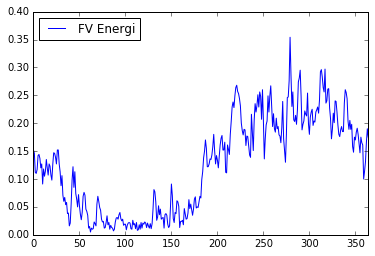

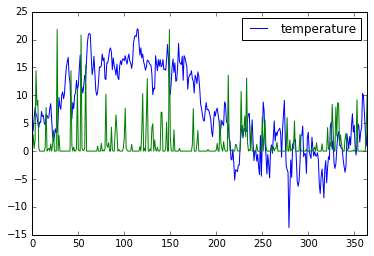

In [3]:
# Loading the data: energy consumption and outside temperature for april/may
df = pd.read_csv("year_data.csv",sep=';')

df2 = pd.read_csv("year_weather.csv",sep=';')
df3 = pd.read_csv("downfall2016.csv",sep=';')
df4 = pd.concat([df2,df3['downfall']],axis=1)
# df2 = df2[:]*-1
df.plot()
df2.plot()
df4['downfall'].plot()
# Plot of the outside temperature

In [ ]:
df4

Intercept    0.210409
B           -0.011522
C           -0.000843
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4425.
Date:                Wed, 01 Nov 2017   Prob (F-statistic):          3.75e-255
Time:                        15:11:26   Log-Likelihood:                 970.03
No. Observations:                 365   AIC:                            -1934.
Df Residuals:                     362   BIC:                            -1922.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

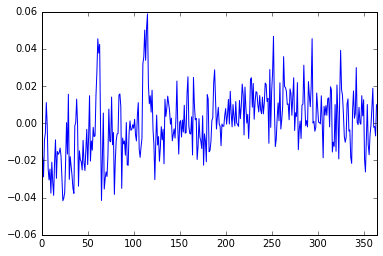

In [4]:
# Apply linear regression to find the residual of the bla bla
import statsmodels.formula.api as sm
dfr = pd.DataFrame({"A": df['FV Energi'], "B":df2['temperature'],  "C":df4['downfall']})
result = sm.ols(formula="A ~ B + C", data=dfr).fit()
# Result of the regression: parameters of the linear model and a summary
print(result.params)
print(result.summary())
result.resid.plot()


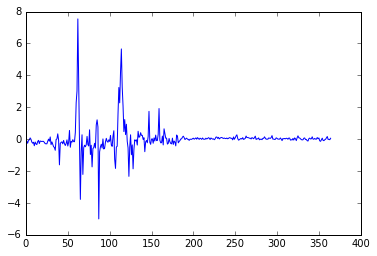

In [18]:
# plt.plot(df['FV Energi'])
# plt.plot(result.predict())
# plt.legend(['FV Energi','Temperatur'])
plt.plot(result.resid/df['FV Energi'])

In [ ]:
# Wind data
df5 = pd.read_csv("year_wind_data.csv",sep=';')

# Quick and dirty hack
large_wind = np.array(df5['speed'])
av_wind = np.zeros(int(len(large_wind)/24))
for i in range(len(av_wind)):
    av_wind[i] = np.average(large_wind[i*24:(i+1)*24])
df4 = pd.concat([df4,pd.Series(av_wind,name="wind")],axis=1)


In [ ]:
dfr = pd.DataFrame({"A": df['FV Energi'], "B":df4['temperature'],  "C":df4['wind']})
result = sm.ols(formula="A ~ B + C", data=dfr).fit()

In [ ]:
result.summary()